In [ ]:
!pip install tensorflow_addons

     |████████████████████████████████| 1.1 MB 15.1 MB/s 


In [ ]:
!pip install imageio_ffmpeg

     |████████████████████████████████| 26.9 MB 1.4 MB/s 


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow_addons as tfa

In [ ]:
!git clone https://github.com/DeePepper/DeePepper.git

Cloning into 'DeePepper'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 30 (delta 7), reused 6 (delta 2), pack-reused 0
Unpacking objects: 100% (30/30), done.


In [ ]:
%cd DeePepper/

/content/DeePepper


In [ ]:
import load_faceswap
model = load_faceswap.model

In [ ]:
model_AtoB = Sequential([
                         model.get_layer('face_in_a'),
                         model.get_layer('encoder'),
                         model.get_layer('decoder_b')
])

model_AtoA = Sequential([
                         model.get_layer('face_in_a'),
                         model.get_layer('encoder'),
                         model.get_layer('decoder_a')
])

In [ ]:
import re
import subprocess
import os
import struct
import sys

from ast import literal_eval
from bisect import bisect
from concurrent import futures
from zlib import crc32

import cv2
import imageio
import imageio_ffmpeg as im_ffm
import numpy as np
from tqdm import tqdm


def read_image(filename, raise_error=False, with_metadata=False):
    success = True
    image = None
    try:
        if not with_metadata:
            retval = cv2.imread(filename)
            if retval is None:
                raise ValueError("Image is None")
        else:
            with open(filename, "rb") as infile:
                raw_file = infile.read()
                metadata = png_read_meta(raw_file)
            image = cv2.imdecode(np.frombuffer(raw_file, dtype="uint8"), cv2.IMREAD_UNCHANGED)
            retval = (image, metadata)
    except TypeError as err:
        success = False
        msg = "Error while reading image (TypeError): '{}'".format(filename)
        msg += ". Original error message: {}".format(str(err))
        if raise_error:
            raise Exception(msg)
    except ValueError as err:
        success = False
        msg = ("Error while reading image. This can be caused by special characters in the "
               "filename or a corrupt image file: '{}'".format(filename))
        msg += ". Original error message: {}".format(str(err))
        if raise_error:
            raise Exception(msg)
    except Exception as err:  # pylint:disable=broad-except
        success = False
        msg = "Failed to load image '{}'. Original Error: {}".format(filename, str(err))
        if raise_error:
            raise Exception(msg)
    return retval


In [ ]:
def display_images(image) :
  plt.figure(figsize=(5, 5))
  plt.imshow(image)
  plt.axis("off")
  plt.show()

In [ ]:
image_path = "/content/test_images/trump_RGB.png"
try:
    image_original = read_image(image_path, raise_error=True, with_metadata=False)
except:
    raise ValueError("There was an error")

In [ ]:
image_original = image_original/255
image_original = image_original.reshape(1, 64, 64, 3)

In [ ]:
preds = model.predict([image_original, image_original])

In [ ]:
adv_image_final = cv2.cvtColor(np.float32(adv_img[0]), cv2.COLOR_BGR2RGB)

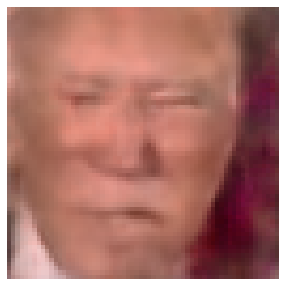

In [ ]:
display_images(preds[0][0][:, :, [2, 1, 0]])

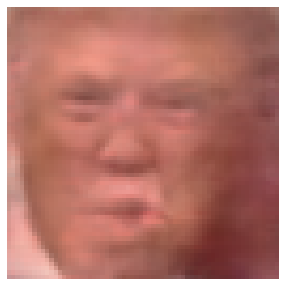

In [ ]:
display_images(preds[1][0][:, :, [2, 1, 0]])

In [ ]:
image_path = "/content/test_images/eps0.05_RGB.png"
try:
    image_adv = read_image(image_path, raise_error=True, with_metadata=False)
except:
    raise ValueError("There was an error")

In [ ]:
image_adv = image_adv/255
image_adv = image_adv.reshape(1, 64, 64, 3)

In [ ]:
preds_adv = model.predict([image_adv, image_adv])

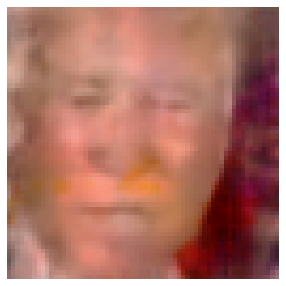

In [ ]:
display_images(preds_adv[0][0][:, :, [2, 1, 0]])

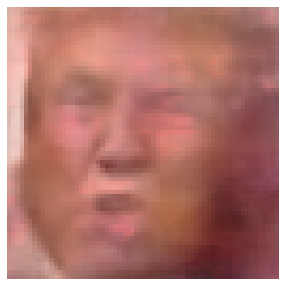

In [ ]:
display_images(preds_adv[1][0][:, :, [2, 1, 0]])

In [ ]:
image_path = "/content/test_images/eps0.1_RGB.png"
try:
    image_adv2 = read_image(image_path, raise_error=True, with_metadata=False)
except:
    raise ValueError("There was an error")

In [ ]:
image_adv2 = image_adv2/255
image_adv2 = image_adv2.reshape(1, 64, 64, 3)

In [ ]:
preds_adv2 = model.predict([image_adv2, image_adv2])

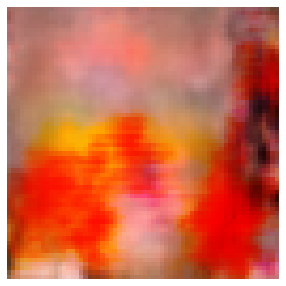

In [ ]:
display_images(preds_adv2[0][0][:, :, [2, 1, 0]])